---

# Lib

In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import re

from sklearn.preprocessing import MultiLabelBinarizer

from utils.other import parse_label

---

# Train

In [27]:
df_train = pd.read_csv("../data/raw/train.csv")
df_train.columns = df_train.columns.str.strip().str.lower().str.replace(' ', '_')

In [28]:
df_train.head()

,index,comment,n_star,date_time,label
0,0,Mới mua máy này Tại thegioididong thốt nốt cảm...,5,2 tuần trước,{CAMERA#Positive};{FEATURES#Positive};{BATTERY...
1,1,Pin kém còn lại miễn chê mua 8/3/2019 tình trạ...,5,14/09/2019,{BATTERY#Negative};{GENERAL#Positive};{OTHERS};
2,2,Sao lúc gọi điện thoại màn hình bị chấm nhỏ nh...,3,17/08/2020,{FEATURES#Negative};
3,3,"Mọi người cập nhật phần mềm lại , nó sẽ bớt tố...",3,29/02/2020,{FEATURES#Negative};{BATTERY#Neutral};{GENERAL...
4,4,"Mới mua Sài được 1 tháng thấy pin rất trâu, Sà...",5,4/6/2020,{BATTERY#Positive};{PERFORMANCE#Positive};{SER...


In [29]:
df_train.drop(columns=['index', 'n_star', 'date_time'], inplace=True)

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7786 entries, 0 to 7785
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  7786 non-null   object
 1   label    7786 non-null   object
dtypes: object(2)
memory usage: 121.8+ KB


In [31]:
df_train.isnull().sum()

comment    0
label      0
dtype: int64

In [32]:
df_train.duplicated().sum()

0

In [33]:
df_train.head()

,comment,label
0,Mới mua máy này Tại thegioididong thốt nốt cảm...,{CAMERA#Positive};{FEATURES#Positive};{BATTERY...
1,Pin kém còn lại miễn chê mua 8/3/2019 tình trạ...,{BATTERY#Negative};{GENERAL#Positive};{OTHERS};
2,Sao lúc gọi điện thoại màn hình bị chấm nhỏ nh...,{FEATURES#Negative};
3,"Mọi người cập nhật phần mềm lại , nó sẽ bớt tố...",{FEATURES#Negative};{BATTERY#Neutral};{GENERAL...
4,"Mới mua Sài được 1 tháng thấy pin rất trâu, Sà...",{BATTERY#Positive};{PERFORMANCE#Positive};{SER...


## Parsed label

In [34]:
df_train["parsed_labels"] = df_train["label"].apply(parse_label)

In [35]:
print(df_train['parsed_labels'].head())
print()
print(df_train['parsed_labels'].iloc[0])

0    [CAMERA#Positive, FEATURES#Positive, BATTERY#P...
1         [BATTERY#Negative, GENERAL#Positive, OTHERS]
2                                  [FEATURES#Negative]
3    [FEATURES#Negative, BATTERY#Neutral, GENERAL#N...
4    [BATTERY#Positive, PERFORMANCE#Positive, SER&A...
Name: parsed_labels, dtype: object

['CAMERA#Positive', 'FEATURES#Positive', 'BATTERY#Positive', 'PRICE#Positive', 'GENERAL#Positive', 'SER&ACC#Positive']


## Create binary matrix for multi-label classification

### Use `MultiLabelBinarizer()`

In [36]:
mlb = MultiLabelBinarizer()

In [37]:
# Create binary matrix for multi-label classification
matrix_label_train = mlb.fit_transform(df_train['parsed_labels'])

In [38]:
y_df = pd.DataFrame(matrix_label_train, columns=mlb.classes_)
y_df.head()

,BATTERY#Negative,BATTERY#Neutral,BATTERY#Positive,CAMERA#Negative,CAMERA#Neutral,CAMERA#Positive,DESIGN#Negative,DESIGN#Neutral,DESIGN#Positive,FEATURES#Negative,...,PRICE#Positive,SCREEN#Negative,SCREEN#Neutral,SCREEN#Positive,SER&ACC#Negative,SER&ACC#Neutral,SER&ACC#Positive,STORAGE#Negative,STORAGE#Neutral,STORAGE#Positive
0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
# Count positives per label (column-wise) and total labels
label_counts = y_df.sum(axis=0).sort_values(ascending=False)
total_labels = int(y_df.values.sum())

In [40]:
print(f"Unique labels: {mlb.classes_}")

Unique labels: ['BATTERY#Negative' 'BATTERY#Neutral' 'BATTERY#Positive' 'CAMERA#Negative'
 'CAMERA#Neutral' 'CAMERA#Positive' 'DESIGN#Negative' 'DESIGN#Neutral'
 'DESIGN#Positive' 'FEATURES#Negative' 'FEATURES#Neutral'
 'FEATURES#Positive' 'GENERAL#Negative' 'GENERAL#Neutral'
 'GENERAL#Positive' 'OTHERS' 'PERFORMANCE#Negative' 'PERFORMANCE#Neutral'
 'PERFORMANCE#Positive' 'PRICE#Negative' 'PRICE#Neutral' 'PRICE#Positive'
 'SCREEN#Negative' 'SCREEN#Neutral' 'SCREEN#Positive' 'SER&ACC#Negative'
 'SER&ACC#Neutral' 'SER&ACC#Positive' 'STORAGE#Negative' 'STORAGE#Neutral'
 'STORAGE#Positive']


In [41]:
print(f"Total labels in training set: {total_labels}")

Total labels in training set: 25566


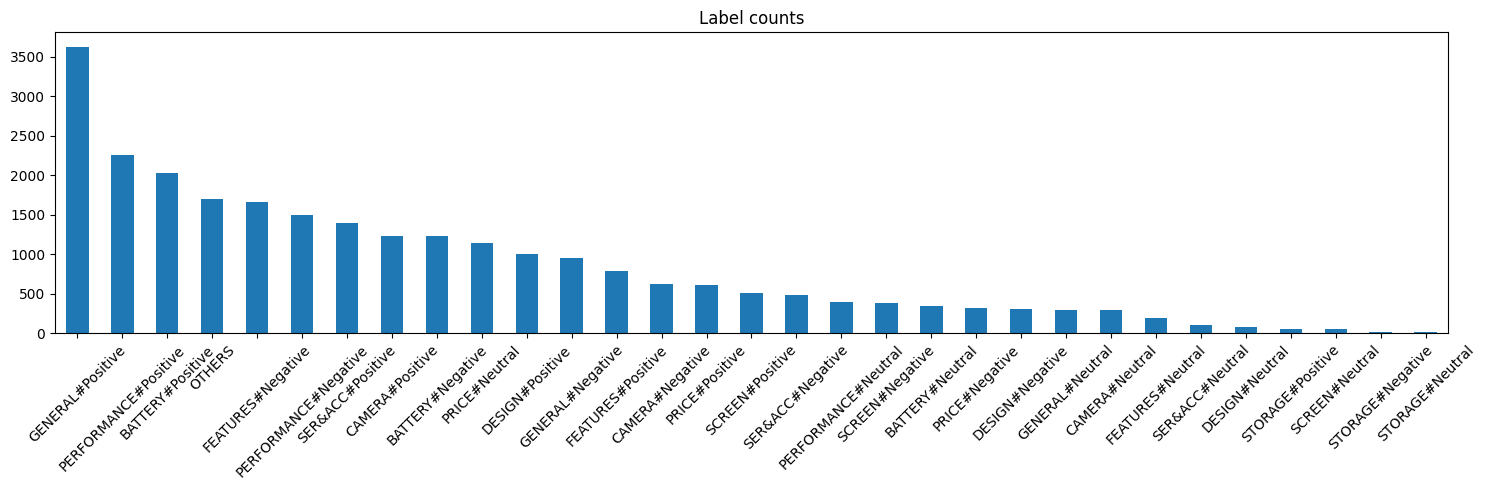

In [42]:
label_counts.plot(kind='bar', figsize=(15,5), title='Label counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

# Val

In [43]:
df_val = pd.read_csv("../data/raw/val.csv")
df_val.columns = df_val.columns.str.strip().str.lower().str.replace(' ', '_')

In [44]:
df_val.head()

,index,comment,n_star,date_time,label
0,0,"Điện thoải ổn. Facelock cực nhanh, vân tay ôk ...",5,5/2/2020,{SCREEN#Positive};{FEATURES#Positive};{PERFORM...
1,1,"Mình mới mua vivo91c. Tải ứng dụng ,games nh...",5,14/05/2019,{FEATURES#Negative};{PERFORMANCE#Positive};{SE...
2,2,Xấu đẹp gì ko biết nhưng rất ưng TGdđ phục vụ ...,5,26/03/2020,{DESIGN#Neutral};{SER&ACC#Positive};
3,3,Màn hình hơi lác khi chơi game. Game nặng thì ...,4,4/6/2019,{PERFORMANCE#Negative};{DESIGN#Negative};{OTHE...
4,4,"Nói chung máy đẹp với màn amoled, ổn trong tầm...",4,12/5/2020,{SCREEN#Positive};{BATTERY#Negative};{DESIGN#P...


In [45]:
df_val.drop(columns=['index', 'n_star', 'date_time'], inplace=True)

In [46]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  2224 non-null   object
 1   label    2224 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [47]:
df_val.isnull().sum()

comment    0
label      0
dtype: int64

In [48]:
df_val.duplicated().sum()

0

In [49]:
df_val.head()

,comment,label
0,"Điện thoải ổn. Facelock cực nhanh, vân tay ôk ...",{SCREEN#Positive};{FEATURES#Positive};{PERFORM...
1,"Mình mới mua vivo91c. Tải ứng dụng ,games nh...",{FEATURES#Negative};{PERFORMANCE#Positive};{SE...
2,Xấu đẹp gì ko biết nhưng rất ưng TGdđ phục vụ ...,{DESIGN#Neutral};{SER&ACC#Positive};
3,Màn hình hơi lác khi chơi game. Game nặng thì ...,{PERFORMANCE#Negative};{DESIGN#Negative};{OTHE...
4,"Nói chung máy đẹp với màn amoled, ổn trong tầm...",{SCREEN#Positive};{BATTERY#Negative};{DESIGN#P...


## Parsed label

In [50]:
df_val["parsed_labels"] = df_val["label"].apply(parse_label)

In [51]:
print(df_val['parsed_labels'].head())
print()
print(df_val['parsed_labels'].iloc[0])

0    [SCREEN#Positive, FEATURES#Positive, PERFORMAN...
1    [FEATURES#Negative, PERFORMANCE#Positive, SER&...
2                   [DESIGN#Neutral, SER&ACC#Positive]
3      [PERFORMANCE#Negative, DESIGN#Negative, OTHERS]
4    [SCREEN#Positive, BATTERY#Negative, DESIGN#Pos...
Name: parsed_labels, dtype: object

['SCREEN#Positive', 'FEATURES#Positive', 'PERFORMANCE#Positive', 'GENERAL#Positive']


## Create binary matrix for multi-label classification

### Use `MultiLabelBinarizer()`

In [52]:
mlb = MultiLabelBinarizer()

In [53]:
# Create binary matrix for multi-label classification
matrix_label_train = mlb.fit_transform(df_val['parsed_labels'])

In [54]:
y_df = pd.DataFrame(matrix_label_train, columns=mlb.classes_)
y_df.head()

,BATTERY#Negative,BATTERY#Neutral,BATTERY#Positive,CAMERA#Negative,CAMERA#Neutral,CAMERA#Positive,DESIGN#Negative,DESIGN#Neutral,DESIGN#Positive,FEATURES#Negative,...,PRICE#Positive,SCREEN#Negative,SCREEN#Neutral,SCREEN#Positive,SER&ACC#Negative,SER&ACC#Neutral,SER&ACC#Positive,STORAGE#Negative,STORAGE#Neutral,STORAGE#Positive
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [55]:
# Count positives per label (column-wise) and total labels
label_counts = y_df.sum(axis=0).sort_values(ascending=False)
total_labels = int(y_df.values.sum())

In [56]:
print(f"Unique labels: {mlb.classes_}")

Unique labels: ['BATTERY#Negative' 'BATTERY#Neutral' 'BATTERY#Positive' 'CAMERA#Negative'
 'CAMERA#Neutral' 'CAMERA#Positive' 'DESIGN#Negative' 'DESIGN#Neutral'
 'DESIGN#Positive' 'FEATURES#Negative' 'FEATURES#Neutral'
 'FEATURES#Positive' 'GENERAL#Negative' 'GENERAL#Neutral'
 'GENERAL#Positive' 'OTHERS' 'PERFORMANCE#Negative' 'PERFORMANCE#Neutral'
 'PERFORMANCE#Positive' 'PRICE#Negative' 'PRICE#Neutral' 'PRICE#Positive'
 'SCREEN#Negative' 'SCREEN#Neutral' 'SCREEN#Positive' 'SER&ACC#Negative'
 'SER&ACC#Neutral' 'SER&ACC#Positive' 'STORAGE#Negative' 'STORAGE#Neutral'
 'STORAGE#Positive']


In [57]:
print(f"Total labels in training set: {total_labels}")

Total labels in training set: 7235


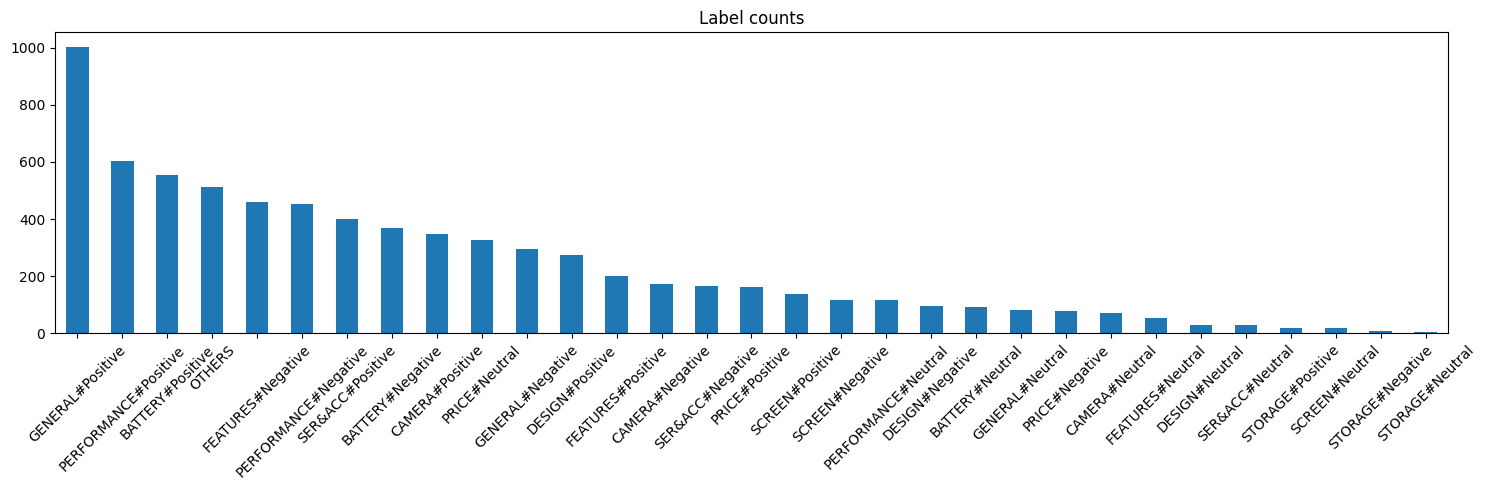

In [58]:
label_counts.plot(kind='bar', figsize=(15,5), title='Label counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()